<a href="https://colab.research.google.com/github/Rodcbatista/Codenation-Project/blob/master/Codenation_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dados_treino = pd.read_csv('https://raw.githubusercontent.com/Rodcbatista/Codenation-Projetct/master/train.csv', sep=",",encoding="utf-8")
dados_teste = pd.read_csv('https://raw.githubusercontent.com/Rodcbatista/Codenation-Projetct/master/test.csv', sep=",",encoding="utf-8")

In [ ]:
dados_treino.shape, dados_teste.shape

((13730, 167), (4576, 47))

In [ ]:
dados_treino.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,...,13730.0,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000,6355.000000,6355.000000,6354.000000,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,0.002185,0.000146,0.000947,0.000073,0.000073,0.0,0.000437,0.000510,0.009687,0.000947,0.001602,0.000146,0.0,0.004151,...,0.0,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,4.083467,3.833360,2.608812,4.375984,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,0.046695,0.012069,0.030757,0.008534,0.008534,0.0,0.020901,0.022575,0.097947,0.030757,0.039998,0.012069,0.0,0.064301,...,0.0,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,1.603004,1.661301,2.234009,1.210998,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.

In [ ]:
dados_teste.info

<bound method DataFrame.info of                                   NU_INSCRICAO  CO_UF_RESIDENCIA  ... Q027  Q047
0     73ff9fcc02f0a99919906c942c2e1a1042cdcf98                41  ...    C     A
1     71a95f9f1b91a82c65ad94abbdf9f54e6066f968                21  ...    F     A
2     b38a03232f43b11c9d0788abaf060f7366053b6d                23  ...  NaN     A
3     70b682d9a3636be23f6120fa9d6b164eb3c6002d                15  ...  NaN     A
4     715494628a50142ce8cb17191cfe6d0f3cae0934                41  ...  NaN     A
...                                        ...               ...  ...  ...   ...
4571  dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b                41  ...  NaN     A
4572  a75fa8770257e7c9368d059fe53d9ef431f4bdef                35  ...  NaN     A
4573  655fa6306720ff16e825903b5422a46608a77545                35  ...  NaN     D
4574  1f4bc3e3d56212d500625bfe8ac78ccff4362293                52  ...  NaN     A
4575  adf0d15b54317b6564ef56dad2b775bbb0ef50cc                33  ...    B   

In [ ]:
features = ['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']
label = ['NU_NOTA_MT']

X = dados_treino[features].fillna(dados_treino[features].fillna(0))
y = dados_treino[label].fillna(dados_treino[label].fillna(0))

In [ ]:
X.describe(), y.describe()

(         NU_NOTA_CN    NU_NOTA_LC    NU_NOTA_CH  NU_NOTA_REDACAO
 count  13730.000000  13730.000000  13730.000000     13730.000000
 mean     356.621515    381.166737    398.923911       390.447633
 std      213.282315    234.648409    237.174594       267.749316
 min        0.000000      0.000000      0.000000         0.000000
 25%      365.625000      0.000000    345.900000         0.000000
 50%      433.100000    486.000000    499.600000       480.000000
 75%      493.200000    548.300000    564.400000       580.000000
 max      806.400000    763.600000    807.000000      1000.000000,
          NU_NOTA_MT
 count  13730.000000
 mean     356.092607
 std      228.844193
 min        0.000000
 25%        0.000000
 50%      422.500000
 75%      504.400000
 max      952.000000)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
predicao = regressor.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y, predicao)
print("MSE Treino:", MSE)

MSE Treino: 849.7666618718135


In [ ]:
from sklearn.metrics import r2_score
rscore = r2_score(y, predicao)
print(rscore)

0.9837725033916572


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


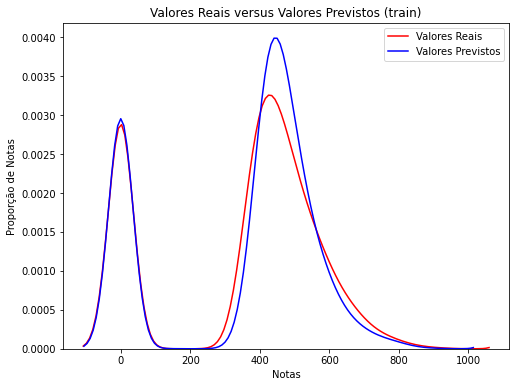

In [ ]:
plt.figure(figsize=(8, 6))
ax1 = sns.distplot(y, hist=False, color="r", label="Valores Reais")
sns.distplot(predicao, hist=False, color="b", label="Valores Previstos" , ax=ax1)


plt.title('Valores Reais versus Valores Previstos (train)')
plt.xlabel('Notas')
plt.ylabel('Proporção de Notas')

plt.show()
plt.close()

In [ ]:
predicao_t = regressor.predict(dados_teste[features].fillna(0))
predicao_t.min(), predicao_t.max()

(0.0, 872.3900000000001)

In [ ]:
from google.colab import files
 
coluna_label = 'NU_NOTA_MT'
 
 
predicao_codenation = predicao_t
 
 
answer_df= pd.DataFrame(dados_teste.NU_INSCRICAO)
answer_df[coluna_label] = predicao_codenation
 
answer_df.to_csv('answer.csv', index=False) 
files.download('answer.csv')

In [ ]:
answer_df.describe()